# Bonds Project

*By Daniel Deutsch and José Lucas Barretto*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Matplotlib style
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 7),
    'axes.prop_cycle': plt.cycler(color=['#4C72B0', '#C44E52', '#55A868', '#8172B2', '#CCB974', '#64B5CD']),
    'axes.facecolor': '#EAEAF2'
})

# Question 1

A bond is a fixed income security that represents a loan made by an investor to a borrower. A bond can be issued by governmental or corporate institutions to finance their operations. Investors that buy bonds are lending money to the bond issuer, and, in return, they receive a fixed interest (or coupons) for their investment.

Bonds are issued with a given price, and pay back a given face-value at the date of maturity, as well as coupon rates (interest) on the given coupon dates.

Because bonds are fixed income instruments, their price is closely related to interest rates. Moreover, bond prices vary inversely with interest rates. This happens because if interest rates move up, investors will prefer buying newly issued bonds that pay more interest, hence drawing down the price of bonds that pay less interest. The contrary example is also true.

# Question 2

Once we accessed the [European Central Bank Website](https://drive.google.com/drive/u/0/folders/1SSQgOKYpzfZC_0HwGrV7tfcd9-6u5r8k) we selected the date Jan 4th 2010 for AAA rated bonds. This parameter selection provided us the following spot yields (for maturities 0.5m, 1y, 1.5y, ..., 5y):

In [3]:
# Defines parameters
n = 5     # Number of years 
m = 2     # Number of payment periods in a year (2 because its semi-annual payments)
M = 100   # Par value (100$ According to the European Central Bank Website)

# Obtains the spot yields from the European Central Bank Website
df = pd.DataFrame([
    { 'maturity': 0.5, 'spot_rate': 0.00490 },
    { 'maturity': 1, 'spot_rate': 0.00833 },
    { 'maturity': 1.5, 'spot_rate': 0.01159 },
    { 'maturity': 2, 'spot_rate': 0.01446 },
    { 'maturity': 2.5, 'spot_rate': 0.01702 },
    { 'maturity': 3, 'spot_rate': 0.01933 },
    { 'maturity': 3.5, 'spot_rate': 0.02145 },
    { 'maturity': 4, 'spot_rate': 0.02339 },
    { 'maturity': 4.5, 'spot_rate': 0.02518 },
    { 'maturity': 5, 'spot_rate': 0.02683 },
])

df

,maturity,spot_rate
0,0.5,0.00490
1,1.0,0.00833
2,1.5,0.01159
3,2.0,0.01446
4,2.5,0.01702
5,3.0,0.01933
6,3.5,0.02145
7,4.0,0.02339
8,4.5,0.02518
9,5.0,0.02683


# Question 3

The spot rate represents the yield to maturity of a hypothetical zero-coupon bond. In other words, the spot rate represents the interest rate at which future returns are discounted in order to estimate their present value. These values are not always observable in the market, and must therefore be estimated from existing zero coupon bonds and fixed coupon bond prices or yields. It can be obtained through the following:

\begin{align*}
    y & = m \left[\left(\frac{M}{P}\right)^{\frac{1}{m*n}}-1\right]
\end{align*}

Therefore, the price $P$ of the STRIPS can be obtained through:

\begin{align*}
    P & = \frac{M}{\left(1 + \frac{y}{m}\right)^{m*n}}
\end{align*}

In [4]:
# Calculates the STRIP for each spot rate
df['strip'] = M / (1 + df['spot_rate'] / m)**(m*n)

df

,maturity,spot_rate,strip
0,0.5,0.00490,97.582693
1,1.0,0.00833,95.928841
2,1.5,0.01159,94.385499
3,2.0,0.01446,93.049378
4,2.5,0.01702,91.875118
5,3.0,0.01933,90.829512
6,3.5,0.02145,89.881419
7,4.0,0.02339,89.023356
8,4.5,0.02518,88.239626
9,5.0,0.02683,87.523911


We can observe from the print above that the STRIPs are below the par value, which is a direct result from the inverse relationship between the interest rate (spot rate) and the bond price (STRIP). In other words, when interest rates rise, bond prices fall, which means that it is being traded at a discount. Consequently, when interest rates fall, bond prices rise, which means that it is being traded at a premium.

# Question 4

Forward rates represent the interest rates of future periods (spot rates are today’s rates). It can be obtained through the following:

\begin{align*}
    f(t) & = m * \left(-1 + \frac{\left(1+\frac{s_t}{m}\right)^{l_{s_t}}}{\left(1+\frac{s_{t-1}}{m}\right)^{l_{s_{t-1}}}}\right)
\end{align*}

In [5]:
# Obtains the total number of periods for the respective spot rate
df['l'] = 2*df['maturity']

# Calculates the forward rate
df['forward_rate'] = m * (-1 + ((1 + df['spot_rate']/m)**(df['l'])) / ((1 + df['spot_rate'].shift()/m)**(df['l'].shift())) )

df

,maturity,spot_rate,strip,l,forward_rate
0,0.5,0.00490,97.582693,1.0,NaN
1,1.0,0.00833,95.928841,2.0,0.011766
2,1.5,0.01159,94.385499,3.0,0.018126
3,2.0,0.01446,93.049378,4.0,0.023095
4,2.5,0.01702,91.875118,5.0,0.027293
5,3.0,0.01933,90.829512,6.0,0.030920
6,3.5,0.02145,89.881419,7.0,0.034217
7,4.0,0.02339,89.023356,8.0,0.037022
8,4.5,0.02518,88.239626,9.0,0.039557
9,5.0,0.02683,87.523911,10.0,0.041741


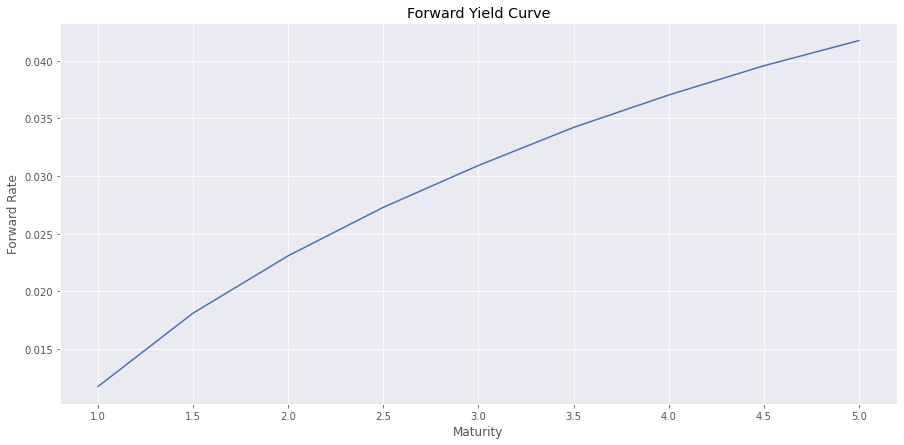

In [6]:
# Plots the forward yield curve
plt.plot(df['maturity'], df['forward_rate'])
plt.title("Forward Yield Curve")
plt.ylabel("Forward Rate")
plt.xlabel("Maturity")
plt.show()

# Question 5

## a) and b) Bond Price Using Spot and Forward Rates

The price of a bond depends on its par value, its coupon, its discount rate and its maturity. Mathematically, it is defined as follows:

\begin{align*}
    P & = \frac{M}{\left(1 + \frac{y}{m}\right)^N} + \sum^{N}_{i=1} \frac{C}{\left(1 + \frac{y}{m}\right)^i}
\end{align*}

When using forward rates, the formula is different, because we have to account for the product of all forward rate discount rates.

We can translate that into code by the following function:

In [7]:
def bond_price(C, M, y, m, forward):
    """
    Price a bond using the present value formula.

    Args:
        C (float): coupon
        M (float): principal amount
        y (float): list with according discount rates
        m (int): number of payment periods per year
        forward (bool): if True yields are interpreted as forward rates

    Returns:
        float: present value of the bond
    """
    # Number periods to maturity
    N = len(y)

    # Calculates price using spot rates
    if forward:
        P = M / np.prod([(1+y[j]/m) for j in range(N)])
        for i in range(N):
            P += C / np.prod([(1+y[j]/m) for j in range(i+1)])

    # Calculates price using forward rates
    else:
        P = M / ((1+y[N-1]/m)**N)
        for i in range(N):
            P += C / ((1+y[i]/m)**(i+1))
    
    return P

Now, assuming that the French government issued today (1st of January 2022) a 3-year government bond that pays semi-annually a 4% coupon (par value = 1,000€), we have the following:

In [8]:
# Defines parameters
maturity = 3     # Maturity period
M = 1000         # Par value
C = 0.04 * M/2   # Coupon
m = 2            # Number of payments per period

# Calculates bond price using spot rates
y = df[df['maturity'] <= maturity]['spot_rate']
P = bond_price(C, M, y, m, forward=False)
print(f"Bond price with spot rate: {P:.4f}")

# Calculates bond price using forward rates
y = df[df['maturity'] <= maturity]['forward_rate'].tolist()
y[0] = df['spot_rate'].iloc[0]
P = bond_price(C, M, y, m, forward=True)
print(f"Bond price with forward rate: {P:.4f}")

Bond price with spot rate: 1060.8447
Bond price with forward rate: 1060.8447


## c) Observations

We can see that, as expected, we obtain the same present value bond price when using forward and spot rates.

# Question 6

## Dirty Price of the Bond

The dirty bond pricing equation using a different spot rate per period becomes:

\begin{align*}
    P & = \frac{M}{\left(1 + \frac{s_N}{m}\right)^{N-1+w}} + \sum_{i=1}^{N-1} \frac{C}{\left(1 + \frac{s_i}{m}\right)^{i+w}}
\end{align*}

We know that coupon are paid semi-annualy, so we can calculate the dirty and clean prices of the bond 45 days after it was issued. Since we're dealing with a US bond, we use the 30/360 day count convention.

In [9]:
# Defines parameters
maturity = 3                                    # Maturity period
M = 1000                                        # Par value
C = 0.04 * M/2                                  # Coupon
m = 2                                           # Number of payments per period
w = (180 - 45)/180                              # days until next pay
y = df[df['maturity'] <= maturity]['spot_rate'] # spot yields

In [10]:
# Dirty price using spot rates
N = len(y)
dirty_price = M / ((1+y[N-1]/m)**(N-1+w))
for i in range(N):
    dirty_price += C / ((1+y[i]/m)**(i+1+w))

print(f"Dirty price: {dirty_price:.4f}")

Dirty price: 1062.5720


## Clean Price of the Bond

Here we will assume that the first coupon is paid at time 0, when the bond is issued. If that is not the case, and the first coupon is only paid after six months, then there would be no accrued interest (since the bond holder did not receive a coupon), and the clean price would be the same as the clean price.

In [11]:
accrued_interest = C*(45/180)
clean_price = dirty_price - accrued_interest
print(f"Clean price: {clean_price:.4f}")

Clean price: 1057.5720


# Question 7

We start by pricing the bond using spot rates.

In [29]:
from sympy import symbols, solve

# Defines parameters
maturity = 3       # Maturity period
M = 1000           # Par value
C = 0.04 * M/2     # Coupon
m = 2              # Number of payments per period
N = len(y)         # Number of periods until maturity

# Calculates bond price using spot rates
y = df[df['maturity'] <= maturity]['spot_rate']
P = bond_price(C, M, y, m, forward=False)
print(f"Bond price with spot rate: {P:.4f}")

Bond price with spot rate: 1060.8447


Now, we set up the equation that we want to solve.

\begin{align*}
    P & = \frac{M}{\left(1 + ytm\right)^{N}} + \sum_{i=1}^{N-1} \frac{C}{\left(1 + ytm\right)^{i}}
\end{align*}

or rewriting it:

\begin{align*}
    0 & = \frac{M}{\left(1 + ytm\right)^{N}} + \sum_{i=1}^{N-1} \frac{C}{\left(1 + ytm\right)^{i}} - P
\end{align*}


In [30]:
ytm = symbols('ytm')
eq = M / ((1+ytm)**(N))
eq += sum([C/((1+ytm)**(i+1)) for i in range(N)]) - P
eq

-1060.84467365362 + 20.0/(ytm + 1) + 20.0/(ytm + 1)**2 + 20.0/(ytm + 1)**3 + 20.0/(ytm + 1)**4 + 20.0/(ytm + 1)**5 + 1020.0/(ytm + 1)**6

Now, let's solve the equation numerically.

In [38]:
sol = solve(eq, ytm)
sol

[-1.99029825542637,
 0.00951870907064098,
 -1.49519576541833 - 0.857597036341344*I,
 -1.49519576541833 + 0.857597036341344*I,
 -0.504988010719412 - 0.857707264103895*I,
 -0.504988010719412 + 0.857707264103895*I]

We see that the only real and positive solution gives us:

In [39]:
print(f"Yield-to-maturity: {sol[1]:.4f}")

Yield-to-maturity: 0.0095


This means that the total anticipated return on the bond if we hold it until maturity and reinvest the coupons is around 0.0095.

# Question 8

# Question 9